In [1]:
from MTGpred.model.dataset import DecksDataset
from MTGpred.utils.mtgjson import load_cards_df
import json
from sklearn.model_selection import train_test_split

with open("../data/mtgtop8_decks.json", "r") as f:
    decks_json = json.load(f)

cards_df = load_cards_df(data_path="../data/AtomicCards.json")

dataset = DecksDataset(
    cards_df,
    decks_json,
    model_name="allenai/longformer-base-4096",
    cased=False,
    join_tokens=True,
    max_length=4096,
)

/data2/users/javierj/miniconda3/envs/mtg-preds/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
deck_lengths = [sum(d["attention_mask"]) for d in dataset]

max_length = max(deck_lengths)
min_length = min(deck_lengths)
mean_length = sum(deck_lengths) / len(deck_lengths)

print(f"Max length: {max_length}")
print(f"Min length: {min_length}")
print(f"Mean length: {mean_length}")

Max length: 4096
Min length: 4
Mean length: 1226.8201742610988


(array([5.000e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 4.000e+00, 1.100e+01, 7.000e+00, 2.200e+01,
        3.100e+01, 6.300e+01, 1.080e+02, 2.530e+02, 3.830e+02, 5.590e+02,
        7.380e+02, 9.750e+02, 1.237e+03, 1.378e+03, 1.628e+03, 1.923e+03,
        2.033e+03, 2.193e+03, 2.368e+03, 2.325e+03, 2.422e+03, 2.231e+03,
        2.138e+03, 1.877e+03, 1.740e+03, 1.578e+03, 1.379e+03, 1.293e+03,
        1.132e+03, 1.001e+03, 8.890e+02, 7.810e+02, 6.640e+02, 5.430e+02,
        4.620e+02, 3.790e+02, 3.040e+02, 2.690e+02, 2.340e+02, 2.100e+02,
        2.200e+02, 1.610e+02, 1.570e+02, 1.180e+02, 9.300e+01, 8.700e+01,
        6.400e+01, 6.100e+01, 5.100e+01, 2.800e+01, 1.900e+01, 1.100e+01,
        9.000e+00, 9.000e+00, 1.200e+01, 1.100e+01, 5.000e+00, 3.000e+00,
        6.000e+00, 3.000e+00, 3.000e+00, 1.000e+00, 5.000e+00, 4.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 1.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 3.000e+0

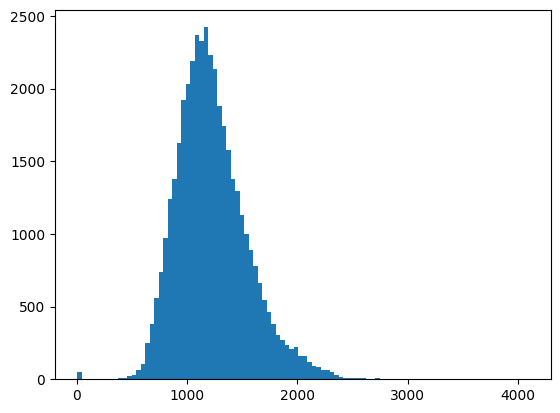

In [7]:
from matplotlib import pyplot as plt

plt.hist(deck_lengths, bins=100)